In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

In [2]:
game_csv = pd.read_csv('./data/Training_dataset_Original.csv',na_values=["NA", "na", "missing"])
gameDf = pd.DataFrame(game_csv)

dataDict = pd.read_csv('./data/Data_Dictionary.csv',na_values="NA")

#Leaderboard
leader_csv = pd.read_csv('./data/Leaderboard_dataset.csv',na_values=["NA", "na", "missing"])
leaderDf = pd.DataFrame(leader_csv)



In [3]:
print(gameDf.shape)
print(dataDict.shape)

(80000, 49)
(49, 2)


In [4]:
dic = dict(zip(dataDict.values[:, 1], dataDict.values[:, 0]))

In [5]:
dic['Average tenure of active revolving credit cards (in days)']

'mvar25'

In [6]:
#remove ID column
del gameDf[dic['Application ID (primary key)']]
del dic['Application ID (primary key)']

leaderAppID = leaderDf['application_key']
del leaderDf['application_key']
leaderX = leaderDf.copy()

In [7]:
gameX = gameDf.iloc[:,:-1]
gameY = gameDf.iloc[:,-1]

In [8]:
range(gameDf["mvar47"].shape[0])

range(0, 80000)

In [9]:
gameX["mvar47"][0]

'C'

In [10]:
#one hot encoding C=0 L=1
gameX['mvar47'] = pd.get_dummies(gameX['mvar47'])
leaderX['mvar47'] = pd.get_dummies(leaderX['mvar47'])

In [11]:
gameX["mvar47"].dtype

dtype('uint8')

# Synthesis begins

In [13]:
print(gameX.shape)
print(leaderX.shape)

gameX = gameX.assign(var345 = (1+gameX['mvar3'])*(1+gameX['mvar4'])*(1+gameX['mvar5']))
leaderX = leaderX.assign(var345 = (1+leaderX['mvar3'])*(1+leaderX['mvar4'])*(1+leaderX['mvar5']) )

print(gameX.shape)
print(leaderX.shape)

gameX  = gameX.assign(mvar678 = (gameX['mvar7'] + gameX['mvar8'])/(1+gameX['mvar6']))
leaderX = leaderX.assign(mvar678 = (leaderX['mvar7'] + leaderX['mvar8'])/(1+leaderX['mvar6']))

print(gameX.shape)
print(leaderX.shape)

df = gameX.copy()

temp16 = df['mvar16'].copy()
temp16[temp16.isnull()] = -1
temp17 = df['mvar17'].copy()
temp17[temp17.isnull()] = -1
temp18 = df['mvar18'].copy()
temp18[temp18.isnull()] = -1


temp16 = temp16 + temp17+ temp18
temp16[temp16>0] = 0.5265
temp16[temp16==0] = 0.1763
temp16[temp16==-1] = 0.2594
temp16[temp16==-2] = 0.2594
temp16[temp16==-3] = 0.4423

df = df.assign(var161718 = temp16)

gameX = df.copy()


df = leaderX.copy()

temp16 = df['mvar16'].copy()
temp16[temp16.isnull()] = -1
temp17 = df['mvar17'].copy()
temp17[temp17.isnull()] = -1
temp18 = df['mvar18'].copy()
temp18[temp18.isnull()] = -1


temp16 = temp16 + temp17+ temp18
temp16[temp16>0] = 0.5265
temp16[temp16==0] = 0.1763
temp16[temp16==-1] = 0.2594
temp16[temp16==-2] = 0.2594
temp16[temp16==-3] = 0.4423

df = df.assign(var161718 = temp16)

leaderX = df.copy()

print(gameX.shape)
print(leaderX.shape)

gameX = gameX.assign(var2223 = gameX['mvar23'] - gameX['mvar22'])
leaderX = leaderX.assign(var2223 = leaderX['mvar23'] - leaderX['mvar22'])

print(gameX.shape)
print(leaderX.shape)



df = gameX.copy()

temp26 = df['mvar26'].copy()
temp26[temp26.isnull()] = -365
temp27 = df['mvar27'].copy()
temp27[temp27.isnull()] = -365

temp26 = (temp26+temp27)/2/365
temp26 = temp26.astype('int64')

temp26[(temp26>=0) & (temp26<=5)] = 0.3243
temp26[temp26>5] = 0.1562
temp26[temp26<0] = 0.4026

df = df.assign(var2627 = temp26)
gameX = df.copy()

df = leaderX.copy()

temp26 = df['mvar26'].copy()
temp26[temp26.isnull()] = -365
temp27 = df['mvar27'].copy()
temp27[temp27.isnull()] = -365

temp26 = (temp26+temp27)/2/365
temp26 = temp26.astype('int64')

temp26[(temp26>=0) & (temp26<=5)] = 0.3243
temp26[temp26>5] = 0.1562
temp26[temp26<0] = 0.4026

df = df.assign(var2627 = temp26)
leaderX = df.copy()

print(gameX.shape)
print(leaderX.shape)

df = gameX.copy()

temp28 = df['mvar28'].copy()
temp28[temp28.isnull()] = -365

temp28 = temp28/365
temp28 = temp28.astype('int64')

temp28[temp28!=0] = 0.1231
temp28[temp28==0] = 0.3605

df = df.assign(var28 = temp28)
gameX = df.copy()


df = leaderX.copy()

temp28 = df['mvar28'].copy()
temp28[temp28.isnull()] = -365

temp28 = temp28/365
temp28 = temp28.astype('int64')

temp28[temp28!=0] = 0.1231
temp28[temp28==0] = 0.3605

df = df.assign(var28 = temp28)
leaderX = df.copy()


print(gameX.shape)
print(leaderX.shape)

df = gameX.copy()
df = df.assign(var3031 = df[["mvar30", "mvar31"]].max(axis=1))
gameX = df.copy()

df = leaderX.copy()
df = df.assign(var3031 = df[["mvar30", "mvar31"]].max(axis=1))
leaderX = df.copy()

print(gameX.shape)
print(leaderX.shape)

df = gameX.copy()

temp33 = df['mvar33'].copy()
temp33[temp33.isnull()] = -5

temp33 = temp33/5
temp33 = temp33.astype('int64')

temp33[temp33<0] = 0.3118
temp33[temp33==1] = 0.2138
temp33[temp33>1] = 0.1601
temp33[temp33==0] = 0.2959

df = df.assign(var33 = temp33)
gameX = df.copy()


df = leaderX.copy()

temp33 = df['mvar33'].copy()
temp33[temp33.isnull()] = -5

temp33 = temp33/5
temp33 = temp33.astype('int64')

temp33[temp33<0] = 0.3118
temp33[temp33==1] = 0.2138
temp33[temp33>1] = 0.1601
temp33[temp33==0] = 0.2959

df = df.assign(var33 = temp33)
leaderX = df.copy()

print(gameX.shape)
print(leaderX.shape)

df = gameX.copy()

temp34 = df['mvar34'].copy()
temp34[temp34.isnull()] = -1

temp34[temp34==0] = 0.2151
temp34[temp34==-1] = 0.2151
temp34[temp34==1] = 0.3589
temp34[temp34==2] = 0.4459
temp34[temp34>2] = 0.5641

df = df.assign(var34 = temp34)
gameX = df.copy()


df = leaderX.copy()

temp34 = df['mvar34'].copy()
temp34[temp34.isnull()] = -1

temp34[temp34==0] = 0.2151
temp34[temp34==-1] = 0.2151
temp34[temp34==1] = 0.3589
temp34[temp34==2] = 0.4459
temp34[temp34>2] = 0.5641

df = df.assign(var34 = temp34)
leaderX = df.copy()



print(gameX.shape)
print(leaderX.shape)

df = gameX.copy()

temp35 = df['mvar35'].copy()
temp35[temp35.isnull()] = -1

temp35[temp35>0] = 0.5137
temp35[temp35==0] = 0.1878
temp35[temp35==-1] = 0.2623

df = df.assign(var35 = temp35)
gameX = df.copy()


df = leaderX.copy()

temp35 = df['mvar35'].copy()
temp35[temp35.isnull()] = -1

temp35[temp35>0] = 0.5137
temp35[temp35==0] = 0.1878
temp35[temp35==-1] = 0.2623

df = df.assign(var35 = temp35)
leaderX = df.copy()

print(gameX.shape)
print(leaderX.shape)

#mvar36, 37, 38

df = gameX.copy()

temp36 = df['mvar36'].copy()

temp36[temp36.isnull()] = -1

temp36[temp36==1] = 0.163769
temp36[temp36==2] = 0.170170
temp36[temp36==3] = 0.190171
temp36[temp36==4] = 0.211005
temp36[temp36==5] = 0.226932
temp36[temp36==6] = 0.247148
temp36[temp36==7] = 0.271086
temp36[temp36==8] = 0.296529
temp36[temp36==9] = 0.309190
temp36[temp36==10] = 0.323132
temp36[temp36==11] = 0.330296
temp36[temp36==12] = 0.33815
temp36[temp36==13] = 0.352103
temp36[temp36==14] = 0.370433
temp36[temp36==15] = 0.365985
temp36[temp36==16] = 0.384926
temp36[temp36==17] = 0.395310
temp36[temp36==18] = 0.449219
temp36[temp36==19] = 0.425926
temp36[temp36<0] = 0.176674
temp36[temp36>=20] = 0.4647

df = df.assign(var36 = temp36)
gameX = df.copy()



df = leaderX.copy()

temp36 = df['mvar36'].copy()

temp36[temp36.isnull()] = -1

temp36[temp36==1] = 0.163769
temp36[temp36==2] = 0.170170
temp36[temp36==3] = 0.190171
temp36[temp36==4] = 0.211005
temp36[temp36==5] = 0.226932
temp36[temp36==6] = 0.247148
temp36[temp36==7] = 0.271086
temp36[temp36==8] = 0.296529
temp36[temp36==9] = 0.309190
temp36[temp36==10] = 0.323132
temp36[temp36==11] = 0.330296
temp36[temp36==12] = 0.33815
temp36[temp36==13] = 0.352103
temp36[temp36==14] = 0.370433
temp36[temp36==15] = 0.365985
temp36[temp36==16] = 0.384926
temp36[temp36==17] = 0.395310
temp36[temp36==18] = 0.449219
temp36[temp36==19] = 0.425926
temp36[temp36<0] = 0.176674
temp36[temp36>=20] = 0.4647

df = df.assign(var36 = temp36)
leaderX = df.copy()


print(gameX.shape)
print(leaderX.shape)

df = gameX.copy()

temp37 = df['mvar37'].copy()

temp37[temp37.isnull()] = -1

temp37[temp37<0] = 0.458344
temp37[temp37==0] = 0.381028
temp37[temp37==1] = 0.309995
temp37[temp37==2] = 0.239528
temp37[temp37==3] = 0.186923
temp37[temp37==4] = 0.159852
temp37[temp37==5] = 0.14485
temp37[temp37==6] = 0.131449
temp37[temp37==7] = 0.118592
temp37[temp37==8] = 0.111612
temp37[temp37==9] = 0.102641
temp37[temp37>=10] = 0.0904

df = df.assign(var37 = temp37)
gameX = df.copy()



df = leaderX.copy()

temp37 = df['mvar37'].copy()

temp37[temp37.isnull()] = -1

temp37[temp37<0] = 0.458344
temp37[temp37==0] = 0.381028
temp37[temp37==1] = 0.309995
temp37[temp37==2] = 0.239528
temp37[temp37==3] = 0.186923
temp37[temp37==4] = 0.159852
temp37[temp37==5] = 0.14485
temp37[temp37==6] = 0.131449
temp37[temp37==7] = 0.118592
temp37[temp37==8] = 0.111612
temp37[temp37==9] = 0.102641
temp37[temp37>=10] = 0.0904

df = df.assign(var37 = temp37)
leaderX = df.copy()


print(gameX.shape)
print(leaderX.shape)

df = gameX.copy()

temp38 = df['mvar38'].copy()

temp38[temp38.isnull()] = -1

temp38[temp38<0] = 0.215139
temp38[temp38==0] = 0.145566
temp38[temp38==1] = 0.176224
temp38[temp38==2] = 0.200382
temp38[temp38==3] = 0.232083
temp38[temp38==4] = 0.252492
temp38[temp38==5] = 0.275282
temp38[temp38==6] = 0.297332
temp38[temp38==7] = 0.298409
temp38[temp38==8] = 0.328731
temp38[temp38==9] = 0.342270
temp38[temp38>=10] = 0.3907

df = df.assign(var38 = temp38)
gameX = df.copy()



df = leaderX.copy()

temp38 = df['mvar38'].copy()

temp38[temp38.isnull()] = -1

temp38[temp38<0] = 0.215139
temp38[temp38==0] = 0.145566
temp38[temp38==1] = 0.176224
temp38[temp38==2] = 0.200382
temp38[temp38==3] = 0.232083
temp38[temp38==4] = 0.252492
temp38[temp38==5] = 0.275282
temp38[temp38==6] = 0.297332
temp38[temp38==7] = 0.298409
temp38[temp38==8] = 0.328731
temp38[temp38==9] = 0.342270
temp38[temp38>=10] = 0.3907

df = df.assign(var38 = temp38)
leaderX = df.copy()


print(gameX.shape)
print(leaderX.shape)

gameX = gameX.assign(var363738 = (gameX['mvar36']*gameX['mvar37']/(1+gameX['mvar38'])) )
leaderX = leaderX.assign(var363738 = (leaderX['mvar36']*leaderX['mvar37']/(1+leaderX['mvar38']) ) )

print(gameX.shape)
print(leaderX.shape)



#mvar39
df = gameX.copy()

temp39 = df['mvar35'].copy()
temp39[temp39.isnull()] = -1

temp39[temp39>0] = 0.4925
temp39[temp39==0] = 0.2109
temp39[temp39==-1] = 0.4390

df = df.assign(var39 = temp39)
gameX = df.copy()


df = leaderX.copy()

temp39 = df['mvar35'].copy()
temp39[temp39.isnull()] = -1

temp39[temp39>0] = 0.4925
temp39[temp39==0] = 0.2109
temp39[temp39==-1] = 0.4390

df = df.assign(var39 = temp39)
leaderX = df.copy()

print(gameX.shape)
print(leaderX.shape)

df = gameX.copy()

temp40 = df['mvar40'].copy()
temp40[temp40.isnull()] = -50
temp40 = temp40/50
temp40 = temp40.round(0)

temp40[temp40>=2] = 0.375
temp40[temp40==1] = 0.1643
temp40[temp40==0] = 0.1540
temp40[temp40<0] = 0.2199

df = df.assign(var40 = temp40)
gameX = df.copy()


df = leaderX.copy()

temp40 = df['mvar40'].copy()
temp40[temp40.isnull()] = -50
temp40 = temp40/50
temp40 = temp40.round(0)

temp40[temp40>=2] = 0.375
temp40[temp40==1] = 0.1643
temp40[temp40==0] = 0.1540
temp40[temp40<0] = 0.2199

df = df.assign(var40 = temp40)
leaderX = df.copy()

print(gameX.shape)
print(leaderX.shape)

df = gameX.copy()

temp41 = df['mvar41'].copy()
temp41[temp41.isnull()] = -25
temp41 = temp41/25
temp41 = temp41.round(0)

temp41[temp41>=4] = 0.3000
temp41[temp41==3] = 0.2231
temp41[ (temp41==2) | (temp41==1) | (temp41==0)] = 0.1610
temp41[temp41<0] = 0.2526

df = df.assign(var41 = temp41)
gameX = df.copy()


df = leaderX.copy()

temp41 = df['mvar41'].copy()
temp41[temp41.isnull()] = -25
temp41 = temp41/25
temp41 = temp41.round(0)

temp41[temp41>=4] = 0.3000
temp41[temp41==3] = 0.2231
temp41[ (temp41==2) | (temp41==1) | (temp41==0)] = 0.1610
temp41[temp41<0] = 0.2526

df = df.assign(var41 = temp41)
leaderX = df.copy()

print(gameX.shape)
print(leaderX.shape)

df = gameX.copy()

temp45 = df['mvar45'].copy()
temp45[temp45.isnull()] = -1

temp45[temp45>0] = 0.3481
temp45[temp45==0] = 0.1268
temp45[temp45<0] = 0.3281

df = df.assign(var45 = temp45)
gameX = df.copy()


df = leaderX.copy()

temp45 = df['mvar45'].copy()
temp45[temp45.isnull()] = -1

temp45[temp45>0] = 0.3481
temp45[temp45==0] = 0.1268
temp45[temp45<0] = 0.3281

df = df.assign(var45 = temp45)
leaderX = df.copy()

print(gameX.shape)
print(leaderX.shape)

df = gameX.copy()

temp46 = df['mvar46'].copy()
temp46[temp46.isnull()] = -1

temp46[temp46>0] = 0.4979
temp46[temp46==0] = 0.2010
temp46[temp46<0] = 0.2968

df = df.assign(var46 = temp46)
gameX = df.copy()



df = leaderX.copy()

temp46 = df['mvar46'].copy()
temp46[temp46.isnull()] = -1

temp46[temp46>0] = 0.4979
temp46[temp46==0] = 0.2010
temp46[temp46<0] = 0.2968

df = df.assign(var46 = temp46)
leaderX = df.copy()

print(gameX.shape)
print(leaderX.shape)







(80000, 47)
(25000, 47)


In [62]:
#drop
df = gameX.copy() 
leader_df = leaderX.copy()
drop_target = ['mvar27']
#number of misssing values
# for i in df.columns:
#     if (100*(80000-gameDf[i].describe()['count'])/80000) > 

In [63]:
for i in drop_target:
    del df[i]
    del leader_df[i]

In [64]:
leader_df.columns

Index(['mvar1', 'mvar2', 'mvar3', 'mvar4', 'mvar5', 'mvar6', 'mvar7', 'mvar8',
       'mvar9', 'mvar10', 'mvar11', 'mvar12', 'mvar13', 'mvar14', 'mvar15',
       'mvar16', 'mvar17', 'mvar18', 'mvar19', 'mvar20', 'mvar21', 'mvar22',
       'mvar23', 'mvar24', 'mvar25', 'mvar26', 'mvar28', 'mvar29', 'mvar30',
       'mvar31', 'mvar32', 'mvar33', 'mvar34', 'mvar35', 'mvar36', 'mvar37',
       'mvar38', 'mvar39', 'mvar40', 'mvar41', 'mvar42', 'mvar43', 'mvar44',
       'mvar45', 'mvar46', 'mvar47'],
      dtype='object')

In [65]:
gameX = df
leaderX = leader_df 

# Synthesis Ends

In [53]:
print(gameX.shape)
print(leaderX.shape)

(80000, 66)
(25000, 66)


In [54]:
#Missing values median
gameX.fillna(gameX.mean(),inplace = True)
leaderX.fillna(gameX.mean(),inplace = True)

# gameX.fillna(0,inplace = True)
# leaderX.fillna(0,inplace = True)

,mvar1,mvar2,mvar3,mvar4,mvar5,mvar6,mvar7,mvar8,mvar9,mvar10,...,var35,var36,var37,var38,var363738,var39,var40,var41,var45,var46
0,1753.0,0.500100,0.000,0.0000,0.000,206.000000,19179.000000,206.00000,14221.000000,19438.0,...,0.1878,0.190171,0.090400,0.176224,16.500000,0.2109,0.2199,0.1610,0.3281,0.2010
1,1894.0,1.970100,0.000,0.0000,0.000,297.000000,19820.000000,19820.00000,176895.000000,66346.0,...,0.1878,0.190171,0.090400,0.232083,9.000000,0.2109,0.2199,0.2231,0.1268,0.2010
2,1774.0,0.171800,0.000,0.0000,0.000,197.000000,2563.000000,877.00000,8869.000000,3637.0,...,0.2623,0.190171,0.159852,0.176224,6.000000,0.4390,0.2199,0.2231,0.1268,0.2010
3,1586.0,0.112300,5.299,0.0000,0.000,1606.702372,17595.807537,6773.68666,34097.436013,0.0,...,0.2623,0.163769,0.381028,0.176224,0.000000,0.4390,0.2199,0.2526,0.3281,0.2968
4,1832.0,1.444200,0.000,0.0000,0.000,179.000000,7577.000000,179.00000,21059.000000,20306.0,...,0.2623,0.395310,0.381028,0.232083,0.000000,0.4390,0.3750,0.2231,0.1268,0.2010
5,1838.0,0.054400,0.241,0.0000,0.000,882.000000,14039.000000,10976.00000,278941.000000,74030.0,...,0.2623,0.370433,0.090400,0.252492,53.200000,0.4390,0.2199,0.2231,0.1268,0.2010
6,1743.0,1.075300,0.272,0.0000,0.000,397.000000,16141.000000,3568.00000,69482.000000,56755.0,...,0.1878,0.296529,0.102641,0.297332,10.285714,0.2109,0.2199,0.2231,0.1268,0.2010
7,1935.0,0.560100,0.000,0.0000,0.000,496.000000,44919.000000,17115.00000,124814.000000,124167.0,...,0.1878,0.271086,0.090400,0.342270,7.000000,0.2109,0.2199,0.2526,0.1268,0.2010
8,1885.0,0.081100,0.000,0.0000,0.000,7369.000000,19264.000000,19264.00000,59956.000000,26633.0,...,0.1878,0.170170,0.186923,0.176224,3.000000,0.2109,0.2199,0.2526,0.1268,0.2968
9,1730.0,0.744400,0.000,0.0000,0.000,0.000000,2103.000000,582.00000,16429.000000,9197.0,...,0.1878,0.247148,0.309995,0.342270,0.600000,0.2109,0.2199,0.2526,0.3281,0.2010


In [55]:
#LR

In [56]:
from sklearn import preprocessing as prep

scaler_list = []
for i in gameX.columns:
    scaler_list.append(prep.StandardScaler().fit(gameX[i]))
    
# prep.StandardScaler()

/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a s

In [57]:
gameX_scaled = gameX.copy()

for i in enumerate(gameX_scaled.columns):
    gameX_scaled[i[1]] = scaler_list[i[0]].transform(gameX_scaled[i[1]])

/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a s

In [58]:
leaderX_scaled = leaderX.copy()

for i in enumerate(leaderX_scaled.columns):
    leaderX_scaled[i[1]] = scaler_list[i[0]].transform(leaderX_scaled[i[1]])

/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/ekka/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a s

In [59]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=1, solver='lbfgs', multi_class='multinomial').fit(gameX_scaled, gameY)

In [60]:
pred1 = clf.predict_proba(leaderX_scaled)

In [61]:
clf.coef_

array([[-0.17610069,  0.13131418, -0.01216337, -0.02465285, -0.03546972,
        -0.05691299,  0.07494432, -0.01944297,  0.05898198, -0.13430697,
        -0.00433704,  0.02982313, -0.06892501,  0.00721303, -0.03160209,
         0.02256683, -0.05248328,  0.06418566,  0.01047613,  0.07274987,
         0.03837505,  0.01571297,  0.04063722, -0.00313355, -0.03930185,
        -0.00781791,  0.00568511,  0.0192157 ,  0.00530355, -0.02528498,
        -0.02131945, -0.00090044, -0.02231735, -0.04657767, -0.01272075,
         0.00466224, -0.02367935,  0.00175587,  0.01191629,  0.00668416,
         0.02197075,  0.09335349, -0.11926675, -0.00523355,  0.02073104,
         0.01994133,  0.24126443,  0.00724056, -0.01707251,  0.05209715,
        -0.00895298,  0.02106636,  0.02488544,  0.0123422 , -0.00742994,
         0.11247983,  0.03708031,  0.06869313,  0.11716657,  0.05887681,
         0.01707792,  0.00264569,  0.03858961,  0.00203496,  0.04504807,
         0.0405418 ]])

In [62]:
clf.coef_.shape

(1, 66)

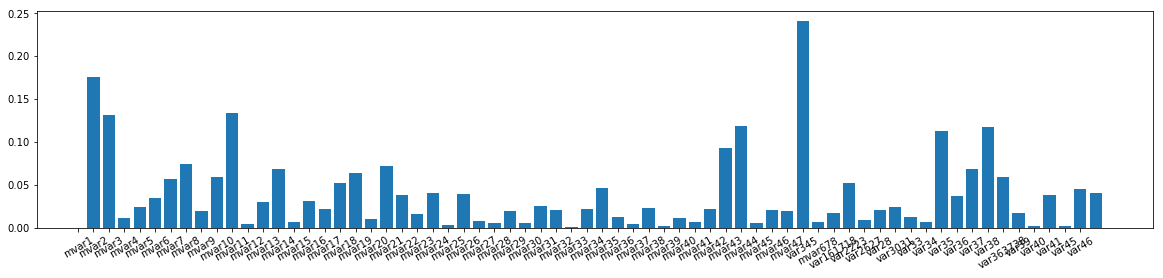

In [86]:
#LR feature imp
lr_coef = clf.coef_.reshape(-1, 1)
plt.figure(figsize=(20, 4))
plt.bar(range(1, len(lr_coef)+1), np.abs(lr_coef) )
plt.xticks(range(len(gameX.columns)), gameX.columns, rotation = 30)
plt.show()

In [63]:
#Method 3

In [64]:
#current

In [65]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import time

/home/ekka/.local/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/ekka/.local/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [66]:
def modelfit(alg, dtrainX, dtrainY, predictors, useTrainCV=True, cv_folds=4, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
#         xgb_param['num_class']=2
        xgtrain = xgb.DMatrix(dtrainX[predictors].values, label=dtrainY.values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
             early_stopping_rounds=early_stopping_rounds,stratified=True)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrainX[predictors], dtrainY ,eval_metric='error')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrainX[predictors])
    dtrain_predprob = alg.predict_proba(dtrainX[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrainY.values, dtrain_predictions))
    #print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain[target], dtrain_predprob))
                    
    #feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    #feat_imp.plot(kind='bar', title='Feature Importances')
    #plt.ylabel('Feature Importance Score')



In [67]:
#Choose all predictors except target & IDcols
t=time.time()
predictors = [x for x in gameX.columns]
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=4, #4
 min_child_weight=1,
 gamma=0,
reg_alpha = 0.05,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

modelfit(xgb1, gameX, gameY, predictors)

print('time',time.time()-t)


Model Report
Accuracy : 0.8237
time 80.02479434013367


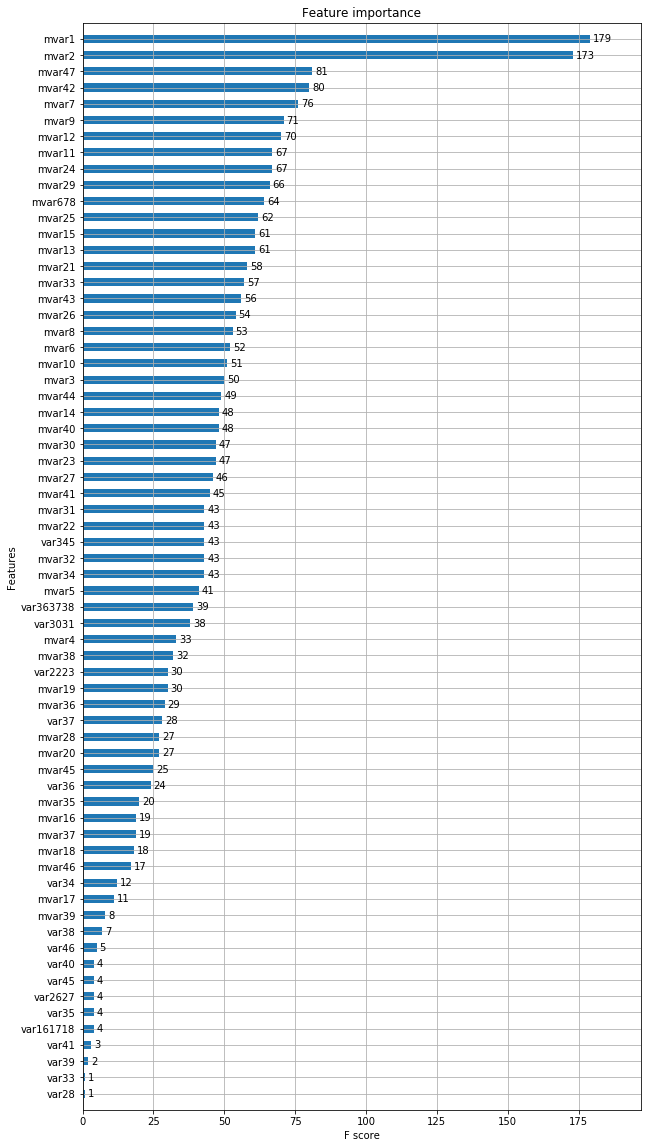

In [83]:
#xgb feature imp
from xgboost import plot_importance
ax = plot_importance(xgb1, height=0.5)
fig = ax.figure
fig.set_size_inches(10,20)
plt.show()

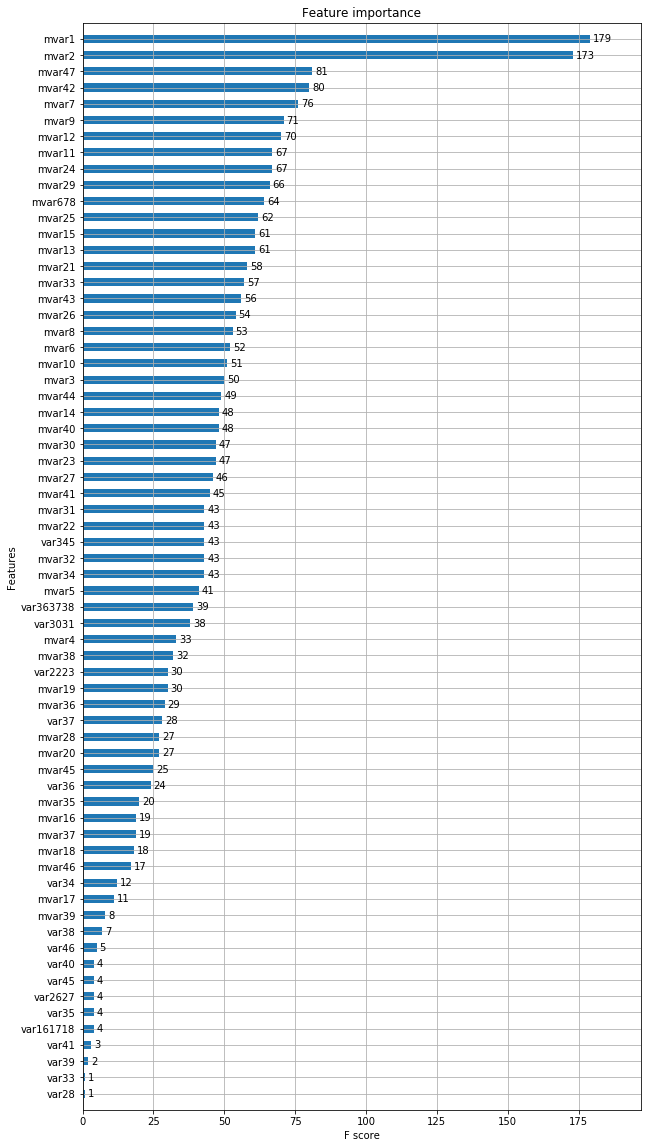

In [83]:
#xgb feature imp
from xgboost import plot_importance
ax = plot_importance(xgb1, height=0.5)
fig = ax.figure
fig.set_size_inches(10,20)
plt.show()

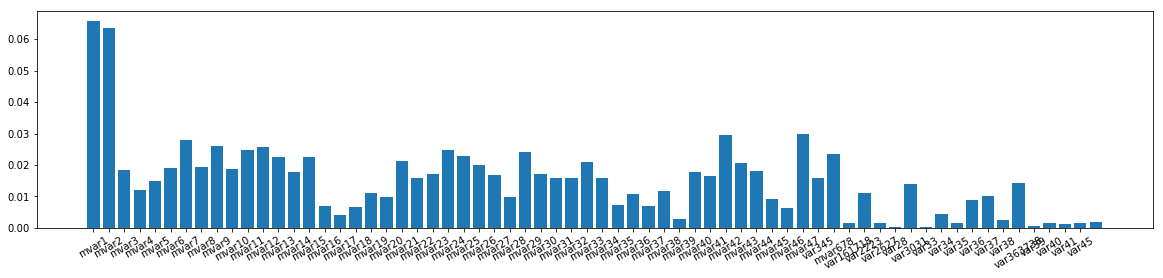

In [68]:
# XGB feature imp
plt.figure(figsize=(20, 4))
plt.bar(range(1, len(xgb1.feature_importances_)+1), xgb1.feature_importances_)
plt.xticks(range(1, len(xgb1.feature_importances_)), gameX.columns, rotation = 30)
plt.show()

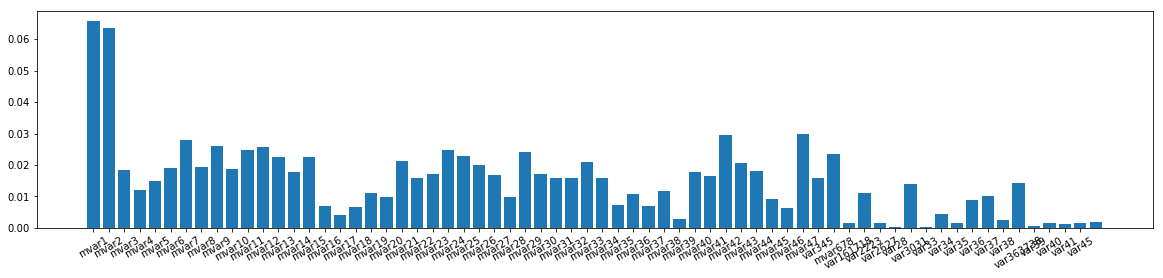

In [68]:
# XGB feature imp
plt.figure(figsize=(20, 4))
plt.bar(range(1, len(xgb1.feature_importances_)+1), xgb1.feature_importances_)
plt.xticks(range(1, len(xgb1.feature_importances_)), gameX.columns, rotation = 30)
plt.show()

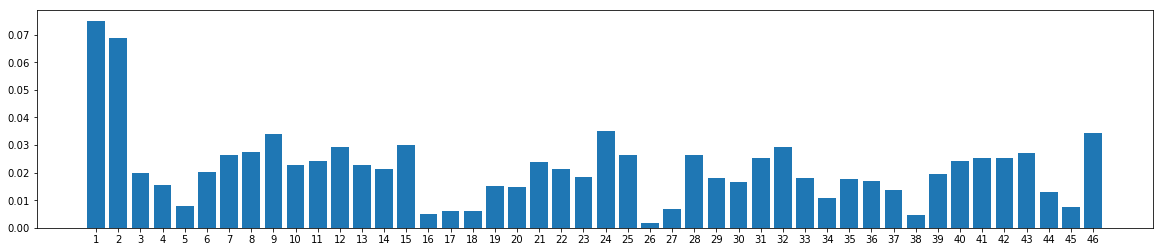

In [81]:
# XGB feature imp
plt.figure(figsize=(20, 4))
plt.bar(range(1, len(xgb1.feature_importances_)+1), xgb1.feature_importances_)
plt.xticks(range(1, len(xgb1.feature_importances_)+1))
plt.show()

In [69]:
pred2 = xgb1.predict_proba(leaderX)

In [70]:
pred1 = pd.DataFrame(pred1)
pred1['application_key'] = leaderAppID
print(pred1.shape)

pred2= pd.DataFrame(pred2)
pred2['application_key'] = leaderAppID
pred2.shape

(25000, 3)


(25000, 3)

In [71]:
pred1

,0,1,application_key
0,0.736320,0.263680,350053
1,0.891561,0.108439,350054
2,0.827006,0.172994,350055
3,0.582630,0.417370,350056
4,0.700264,0.299736,350057
5,0.836657,0.163343,350058
6,0.731447,0.268553,350059
7,0.868201,0.131799,350060
8,0.850819,0.149181,350061
9,0.731821,0.268179,350062


In [72]:
pred2

,0,1,application_key
0,0.846230,0.153770,350053
1,0.983193,0.016807,350054
2,0.955055,0.044945,350055
3,0.718546,0.281454,350056
4,0.766788,0.233212,350057
5,0.986447,0.013553,350058
6,0.849426,0.150574,350059
7,0.986866,0.013134,350060
8,0.984936,0.015064,350061
9,0.863061,0.136939,350062


In [73]:
pred1 = pred1.sort_values(by = 0,kind = 'mergesort',ascending = False)

pred2 = pred2.sort_values(by = 0,kind = 'mergesort',ascending = False)
# pred2 = pred2.sort_values(by = 0,kind = 'mergesort',ascending = True) #true for xgb method3

In [74]:
cols = pred1.columns.tolist()
cols = cols[-1:] + cols[:-1]
pred1 = pred1[cols]

cols = pred2.columns.tolist()
cols = cols[-1:] + cols[:-1]
pred2 = pred2[cols]

In [75]:
pred1 = pred1.loc[:,'application_key':]

pred2 = pred2.loc[:,'application_key':]

In [76]:
submit1 = pred1['application_key'][:10000]
submit1 = pd.DataFrame(submit1)
submit1[0] = 0

submit2 = pred2['application_key'][:10000]
submit2 = pd.DataFrame(submit2)
submit2[0] = 0

In [77]:
# submit.iloc[-400:, 1] = 1

In [78]:
submit1

,application_key,0
21128,371181,0
7820,357873,0
15911,365964,0
23607,373660,0
3642,353695,0
19140,369193,0
23338,373391,0
21731,371784,0
22990,373043,0
8558,358611,0


In [79]:
submit2

,application_key,0
11322,361375,0
24638,374691,0
17393,367446,0
16492,366545,0
3302,353355,0
24532,374585,0
24282,374335,0
21597,371650,0
16771,366824,0
15263,365316,0


In [80]:
# no = 270

submit1.to_csv('flabbergasted_IITGuwahati_'+str(no)+'.csv',header = False, index = False)
submit2.to_csv('flabbergasted_IITGuwahati_'+str(no+1)+'.csv',header = False, index = False)

no+=2

In [81]:
no

270

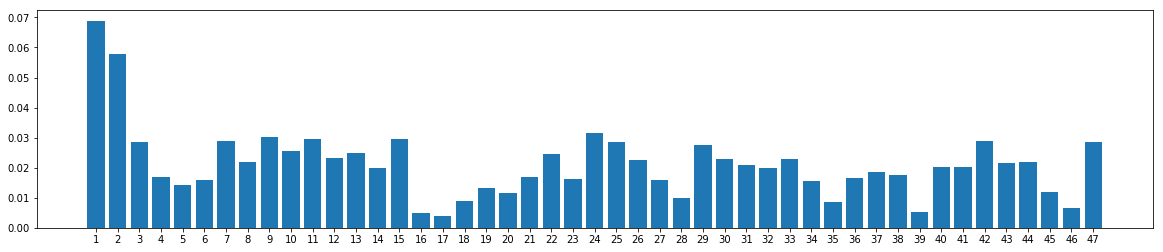

In [48]:
# XGB feature imp
plt.figure(figsize=(20, 4))
plt.bar(range(1, len(xgb1.feature_importances_)+1), xgb1.feature_importances_)
plt.xticks(range(1, len(xgb1.feature_importances_)+1))
plt.show()